In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
img=Image.open('3.JPG')

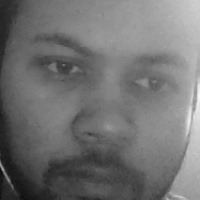

In [5]:
img

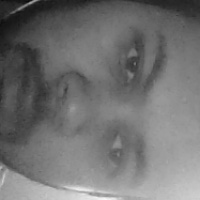

In [7]:
img.rotate(-90)

In [8]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [9]:
img_arr=np.asarray(img)

In [12]:
img_arr.shape

(200, 200)

In [13]:
type(img_arr)

numpy.ndarray

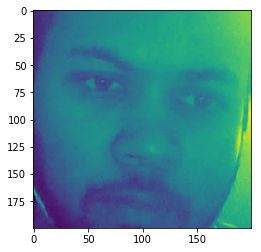

In [14]:
plt.imshow(img_arr)

above data is shown a but green because it is in channel 0 i.e. Red channel

Above you can see that image has ht and wdth of 200x200

#RGB Channel

R- channel 0

G- channel 1

B- channel 2

color values are from 0==No color to  255

In [15]:
img_test_arr=Image.open('imgTest.JPG')

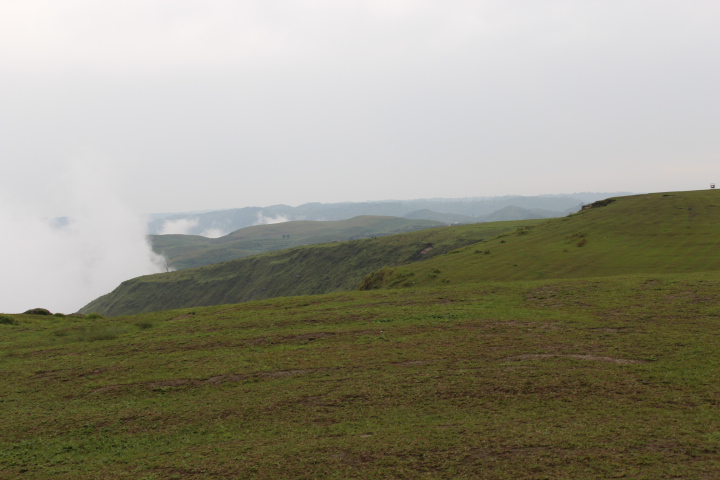

In [16]:
img_test_arr

In [17]:
img_test_arr.width

720

In [18]:
type(img_test_arr)

PIL.JpegImagePlugin.JpegImageFile

In [19]:
test_arr=np.asarray(img_test_arr)

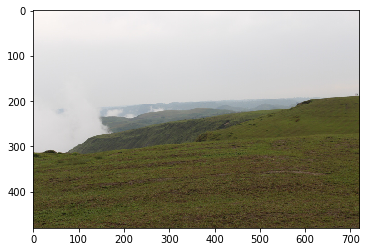

In [20]:
plt.imshow(test_arr)

In [21]:
test_arr.shape

(480, 720, 3)

Only Red Channel

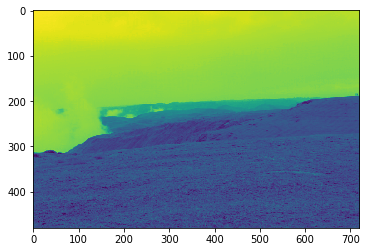

In [25]:
plt.imshow(test_arr[:,:,0])

scale red channel to gray 

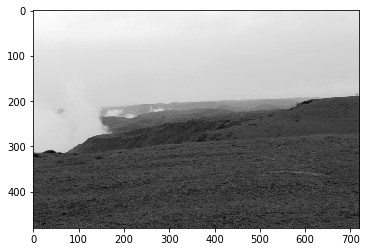

In [26]:
plt.imshow(test_arr[:,:,0],cmap='gray')

Remove red color and show only green and blue

In [33]:
ax=test_arr.copy()

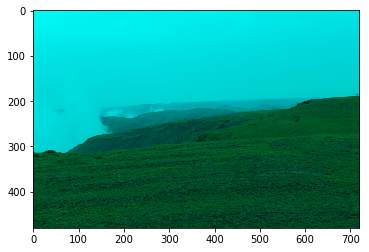

In [36]:
#set red to 0
ax[:,:,0]=0

#show other green and blue

plt.imshow(ax)


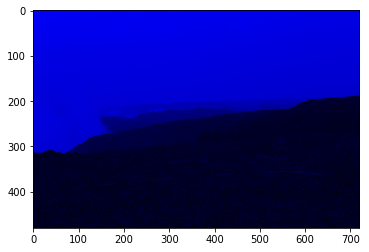

In [37]:
#set green to 0

ax[:,:,1]=0

#show only blue

plt.imshow(ax)

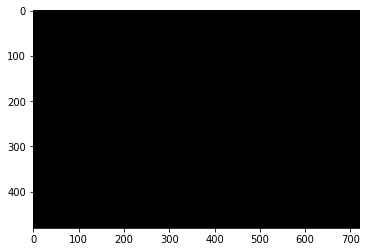

In [39]:
#Further remove Blue color
#set green to 0

ax[:,:,2]=0

#show something

plt.imshow(ax)

## Open CV

In [42]:
import cv2 as cv

In [43]:
img_test=cv.imread('imgTest.JPG')

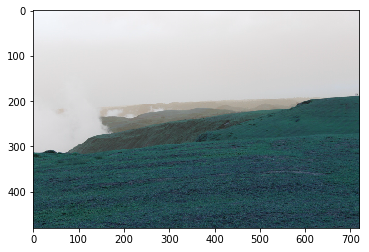

In [45]:
plt.imshow(img_test)

as you can see above, plt showed the picture different than the one which is read by cv2

### In PIL.Image read image as RGB and plt showed this in this way
### open cv read image in BGR format


In [47]:
type(img_test)
#direct numpy

numpy.ndarray

In [48]:
img_test.shape

(480, 720, 3)

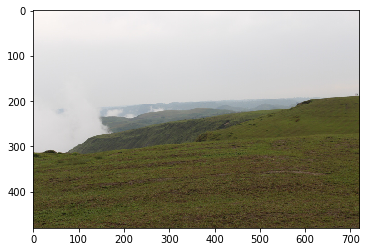

In [49]:
# Convert to RGB

new_img=cv.cvtColor(img_test,cv.COLOR_BGR2RGB)
plt.imshow(new_img)

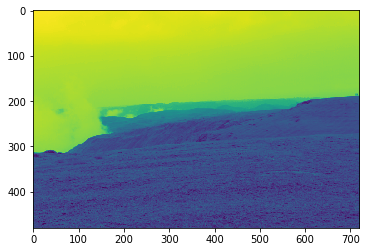

In [52]:
# Directly read image in grey scale

img_grey=cv.imread('imgTest.JPG',cv.IMREAD_GRAYSCALE)
plt.imshow(img_grey)

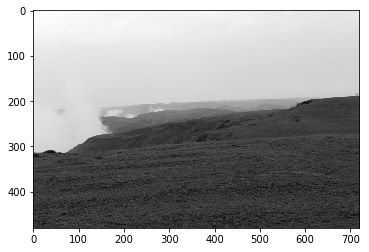

In [54]:
plt.imshow(img_grey,cmap='gray')

In [55]:
img_grey.shape

(480, 720)

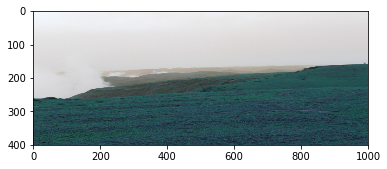

In [56]:
#Resize

img_resized=cv.resize(img_test,(1000,400))
plt.imshow(img_resized)

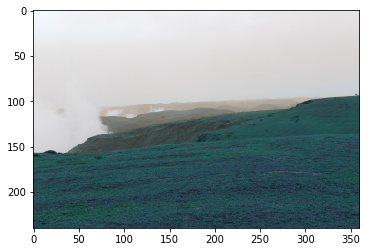

In [62]:
# Resize with Ratio

width_ratio=0.5
ht_ratio=0.5
img_resized=cv.resize(img_test,(0,0),img_test,width_ratio,ht_ratio)

plt.imshow(img_resized)

In [63]:
img_resized.shape
#Half of original

(240, 360, 3)

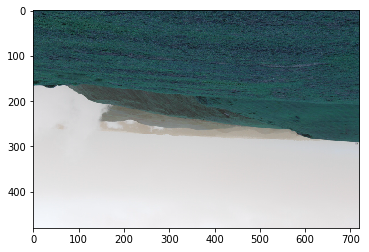

In [67]:
# Flip on horizontal

plt.imshow(cv.flip(img_test,0))


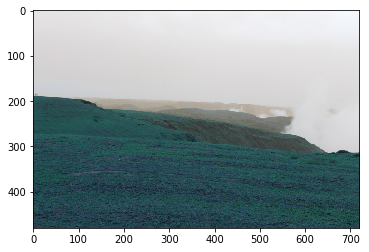

In [66]:

# Flip on vertical

plt.imshow(cv.flip(img_test,1))

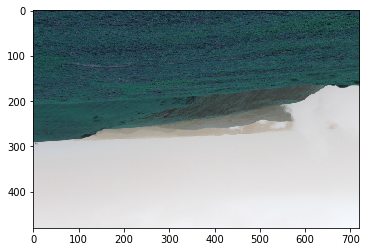

In [68]:

# Flip on horizontal and  vertical

plt.imshow(cv.flip(img_test,-1))

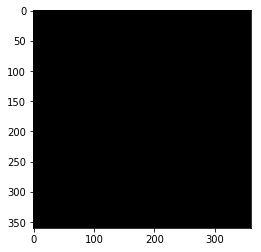

In [71]:
# Create a black image

black_img=np.zeros(shape=[360,360,3],dtype=np.int16)

plt.imshow(black_img)

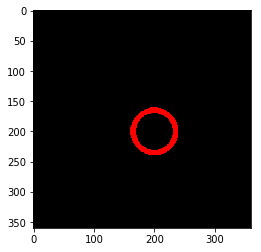

In [77]:
# create a circle

plt.imshow(cv.circle(black_img,center=(200,200),radius=35,color=(255,0,0),thickness=5))

#Set thickness to -1 to make it filled circle

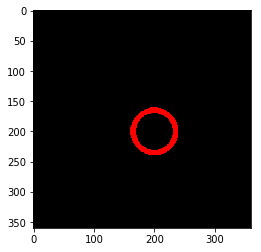

In [80]:
#cicle in-placed
plt.imshow(black_img)

#Similarly can be done for rectangle, triangle,line ... shapes

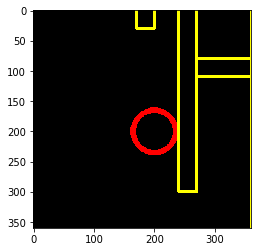

In [88]:
#Write text on image

test_type=cv.FONT_HERSHEY_DUPLEX

plt.imshow(cv.putText(black_img,text='test text!',org=(210,500),fontFace=test_type,fontScale=30,color=(255,255,0),thickness=4))

In [96]:
# Drawing with mouse(Mouse events)

def draw_circle(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),70,(35,69,78),-1)

#connect func with a callback

cv.namedWindow("my_drawing")

# callback

cv.setMouseCallback("my_drawing",draw_circle)

img=np.zeros(shape=(512,512,3),dtype=np.int16)

while True:
    cv.imshow("my_drawing",img)
    
#0xff is escape key
    if cv.waitKey(5) & 0xff ==27:
        break
        
cv.destroyAllWindows()

# To create a clickable rectance as in (lift button down and drag to create boundry) use  
# mouse click func like left down, move and release 